# Analisis de datos.


# Modelo de regresion lineal.

In [32]:
# se importan las bibliotecas necesarias para la ejecucion de la actividad (codigo)
import pandas as pd 
import numpy as np
import warnings
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, classification_report

In [4]:
# Cargar el dataset desde un archivo CSV
titanic = pd.read_csv('Titanic-Dataset.csv')

In [5]:
# mostrar datos del dataset titanic
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Descripción estadística del Dataset
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Información del DataFrame
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# muestar el total de filas y columnas del dataset
titanic.shape

(891, 12)

In [9]:
# Verificar valores faltantes
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

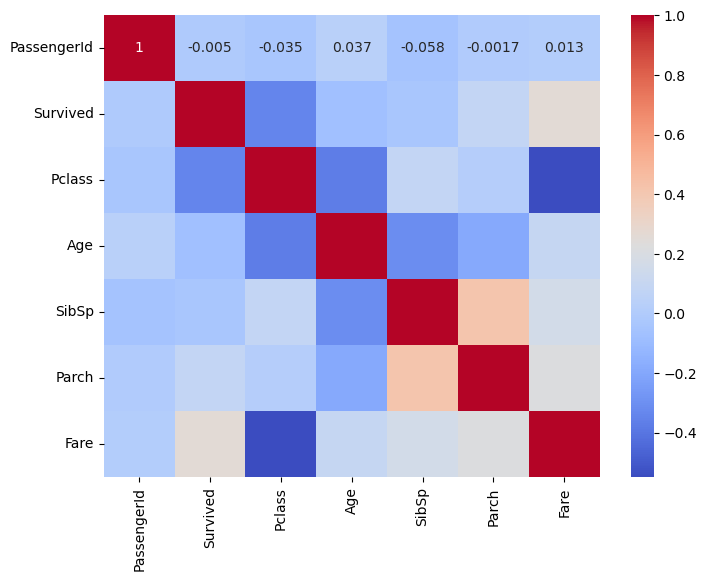

In [10]:
# inserccion de datos faltantes dentro de la varibles
# Seleccion de solo las columnas numéricas
actual= titanic.select_dtypes(include=['number'])
# Calcula la matriz de correlación de las columnas numéricas
correlation_matrix = actual.corr()
# Crea el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [11]:
# Reemplazar los valores faltantes con la media de cada columna
actual.fillna(actual.mean(), inplace=True)

In [12]:
# muestra los datos actualizados en la tabla
actual.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [13]:
# Descripción estadística del Dataset
actual.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
# muestar el total de filas y columnas del dataset actual
actual.shape

(891, 7)

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

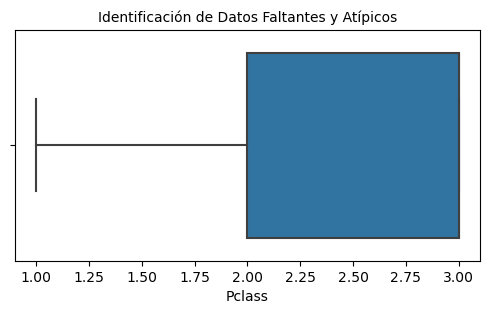

In [16]:
#Identificación de Datos Faltantes y Atípicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=actual['Pclass'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [19]:
# implementacion de la variables x y Y para el test y train
X = actual.drop('Pclass',axis=1) # Se cargan los datos de train sin los datos de la columna precio
Y = actual['Pclass'] # Se cargan los datos de train con los datos de la la columna precio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25,random_state= 0)

In [20]:
print (X_train)

     PassengerId  Survived        Age  SibSp  Parch     Fare
105          106         0  28.000000      0      0   7.8958
68            69         1  17.000000      4      2   7.9250
253          254         0  30.000000      1      0  16.1000
320          321         0  22.000000      0      0   7.2500
706          707         1  45.000000      0      0  13.5000
..           ...       ...        ...    ...    ...      ...
835          836         1  39.000000      1      1  83.1583
192          193         1  19.000000      1      0   7.8542
629          630         0  29.699118      0      0   7.7333
559          560         1  36.000000      1      0  17.4000
684          685         0  60.000000      1      1  39.0000

[668 rows x 6 columns]


In [21]:
print (Y_train)

105    3
68     3
253    3
320    3
706    2
      ..
835    1
192    3
629    3
559    3
684    2
Name: Pclass, Length: 668, dtype: int64


In [22]:
# implementacion del modelo de regresion lineal para el dataset
from sklearn.linear_model import LinearRegression
modelo_regresion = LinearRegression()
modelo_regresion.fit(X_train, Y_train)
# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) 

In [23]:
print (Y_test)

495    3
648    3
278    3
31     1
255    3
      ..
167    3
306    1
379    3
742    1
10     3
Name: Pclass, Length: 223, dtype: int64


In [24]:
Prediccion = modelo_regresion.predict(X_test)

In [25]:
# imprimir las predicciones
print (Prediccion)

[2.55664031 2.60680698 3.09679627 1.1740334  2.27485328 2.02370658
 0.87798708 1.07147723 1.67714345 2.20354801 2.71618904 1.98003079
 2.61623704 2.5645362  1.71170662 2.89267657 2.71740779 2.68551665
 2.51161215 2.7512133  2.79156338 1.203311   2.60218355 2.4330809
 2.72699362 1.14126491 2.56726032 2.33877978 2.18580268 3.19504442
 2.54959091 1.82302333 2.63201738 1.99061351 2.67587867 1.97559969
 2.38010449 2.60761034 2.64552132 2.14223029 1.21853502 2.68991154
 2.55526952 2.88283587 1.56884933 2.61740963 2.60391513 0.63463715
 2.39876969 1.77454872 2.01685976 1.94819208 2.62614431 2.79203803
 2.01679272 2.28891219 1.90688903 3.06357478 3.05171278 2.17784858
 2.7574053  2.75335565 1.27281649 2.35393841 2.34769465 2.55937695
 1.71183124 2.49243684 2.6428496  2.19922014 2.20624376 1.5767236
 2.11803125 2.61679037 2.69257889 2.22866813 1.08071382 2.28548122
 2.55113141 2.5596596  2.52323575 2.60097998 2.64365983 2.84030154
 2.18570958 1.79669598 0.2710887  1.60361276 2.09966907 2.071868

In [26]:
# Convertir predicciones continuas en clases discretas utilizando un umbral
umbral = 0.5
Y_pred_clases = (Prediccion >= umbral).astype(int)

In [27]:
# Calcula el error cuadrático medio (MSE)
mse = mean_squared_error(Y_test, Prediccion)
print("Error cuadrático medio:", mse)

# Calcula la raíz del error cuadrático medio (RMSE)
rmse = mean_squared_error(Y_test, Prediccion, squared=False)
print("Raíz del error cuadrático medio:", rmse)

# Calcula el coeficiente de determinación (R-cuadrado)
r2 = r2_score(Y_test, Prediccion)
print("Coeficiente de determinación (R-cuadrado):", r2)

Error cuadrático medio: 0.33976040687161646
Raíz del error cuadrático medio: 0.5828897038648191
Coeficiente de determinación (R-cuadrado): 0.5092667652245537


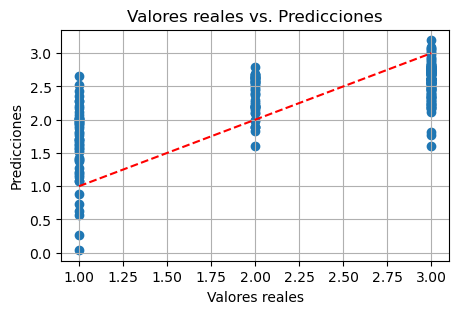

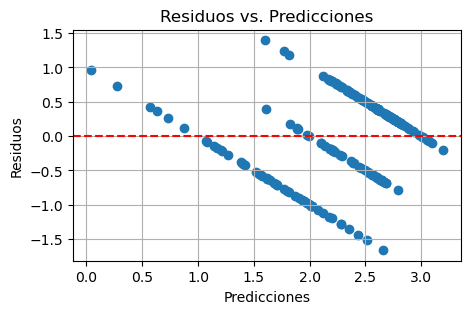

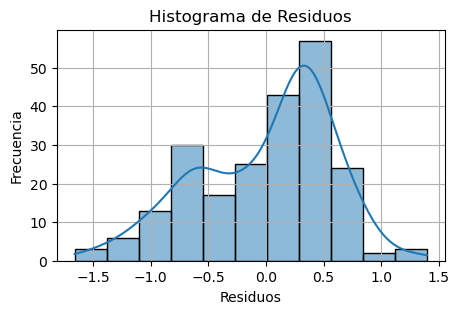

In [37]:
# Gráfico de dispersión de los valores reales vs. las predicciones
plt.figure(figsize=(5, 3))
plt.scatter(Y_test, Prediccion)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], '--', color='red')  # Línea diagonal
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Valores reales vs. Predicciones')
plt.grid(True)
plt.show()
# Gráfico de residuos vs. predicciones
residuos = Y_test - Prediccion
plt.figure(figsize=(5, 3))
plt.scatter(Prediccion, residuos)
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Residuos vs. Predicciones')
plt.axhline(y=0, color='red', linestyle='--')  # Línea horizontal en y=0
plt.grid(True)
plt.show()
# Histograma de residuos
plt.figure(figsize=(5, 3))
sns.histplot(residuos, kde=True)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')
plt.grid(True)
plt.show()
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated")